# Clustering - 0



## Define Datasets

In [1]:
from sklearn.datasets import make_blobs,make_moons
import matplotlib.pyplot as plt

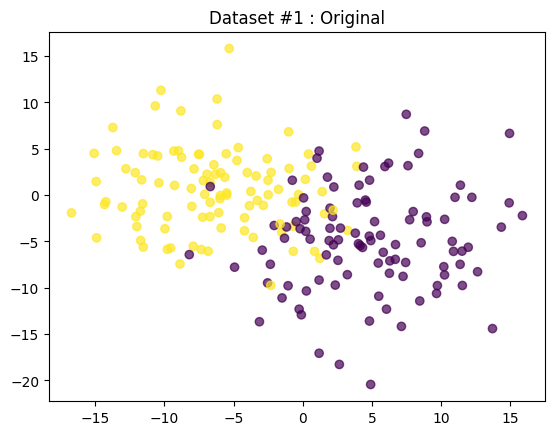

In [2]:
X1, label1 = make_blobs(n_samples=200,n_features=2,centers=2,cluster_std=5,random_state=123)
plt.scatter(X1[:,0],X1[:,1],c=label1,alpha=0.7)
plt.title('Dataset #1 : Original')
plt.show()

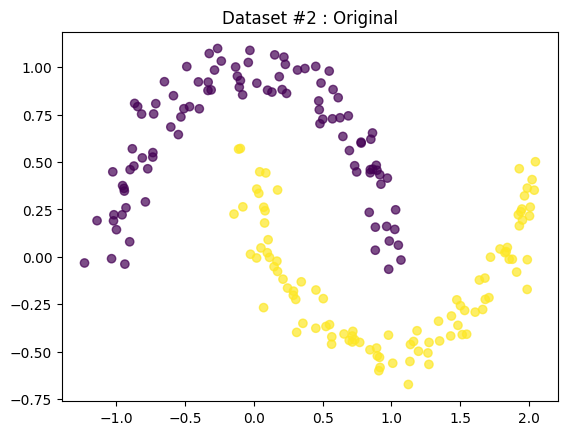

In [3]:
X2, label2 = make_moons(n_samples=200,noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1],c=label2,alpha=0.7)
plt.title('Dataset #2 : Original')
plt.show()

## Aglomerative clustering
Aglomerative clustering, también conocido como clustering jerárquico aglomerativo, es un método de clustering que construye una jerarquía de clusters. Funciona de la siguiente manera:

1. **Inicialización**: Cada punto de datos comienza como su propio cluster individual.
2. **Iteración**: En cada paso, los dos clusters más cercanos se combinan en un solo cluster. La distancia entre los clusters puede medirse de varias maneras, como la distancia mínima (single linkage), la distancia máxima (complete linkage) o la distancia promedio (average linkage).
3. **Repetición**: Este proceso se repite hasta que todos los puntos de datos se han combinado en un solo cluster o hasta que se alcanza un número deseado de clusters.

El resultado del clustering aglomerativo se puede visualizar mediante un dendrograma, que muestra la estructura jerárquica de los clusters y las distancias en las que se combinan.

En el código proporcionado, se utiliza la clase `AgglomerativeClustering` de `sklearn` para realizar el clustering aglomerativo en dos conjuntos de datos diferentes. Los resultados se visualizan mediante gráficos de dispersión coloreados según los clusters asignados.

In [4]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [5]:
X1

array([[ 4.83455936e+00,  1.61209639e+00],
       [-7.19342110e+00,  1.57331116e+00],
       [-1.19919003e+01, -3.38784956e+00],
       [ 8.94965320e+00, -2.34628131e+00],
       [ 5.46630481e+00, -7.33334000e+00],
       [-9.82679362e-01,  2.87439331e+00],
       [ 4.82713114e+00, -1.35870919e+01],
       [-5.95639441e+00, -4.86198432e-02],
       [ 3.25723451e+00, -3.81242660e+00],
       [-1.49388489e+01,  1.46494770e+00],
       [-9.32588959e+00,  4.75039194e+00],
       [ 1.23752259e+00, -6.81998526e+00],
       [ 1.19728386e+01, -5.62837526e+00],
       [-2.58199902e-01, -1.23070271e+01],
       [ 1.49590341e+01,  6.65671714e+00],
       [ 2.25314845e-01, -3.91267708e+00],
       [-5.93898363e+00,  2.41971297e+00],
       [-4.66024882e+00,  5.12509843e+00],
       [-2.49261965e+00,  3.07334679e-02],
       [ 7.73413068e+00, -2.65986906e+00],
       [-5.12306455e-01, -7.42476287e-01],
       [ 1.57887480e+00, -2.01725863e+00],
       [-4.20565001e+00, -2.44769569e+00],
       [-4.

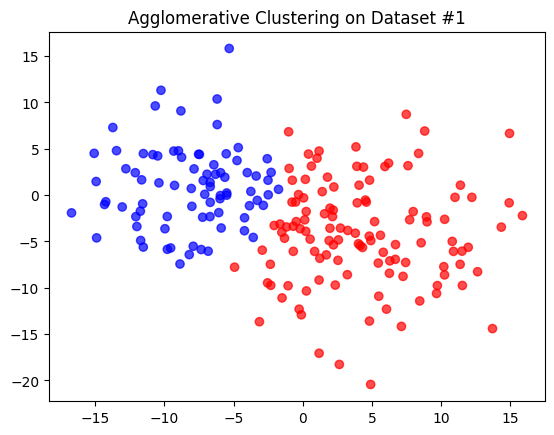

In [ ]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red', 1:'blue'}
plt.scatter(X1[:,0],X1[:,1],c = pd.Series(agglo.labels_).apply(lambda x:myColors[x]),alpha=0.7)
plt.title('Agglomerative Clustering on Dataset #1')
plt.show()


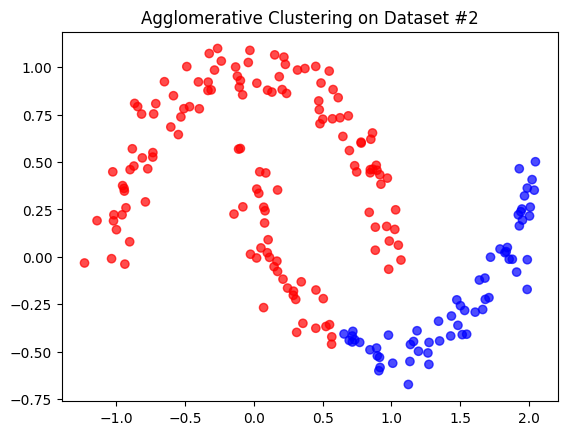

In [7]:
agglo_moons = AgglomerativeClustering(n_clusters=2)
agglo_moons.fit(X2)
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo_moons.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Agglomerative Clustering on Dataset #2')
plt.show()

No acaba de funionar con el dataset de las lunas pero el de blobs si

## Single Linkage
- Single linkage is a method used in hierarchical clustering. It is also known as the nearest neighbor method. In single linkage clustering, the distance between two clusters is defined as the minimum distance between any single data point in the first cluster and any single data point in the second cluster. This method tends to produce long, "chain-like" clusters.

- A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It shows the arrangement of the clusters produced by hierarchical clustering. The dendrogram illustrates the relationships between the clusters and the order in which they were merged or split. The height of each merge (or split) represents the distance (or dissimilarity) between the clusters being merged (or split).

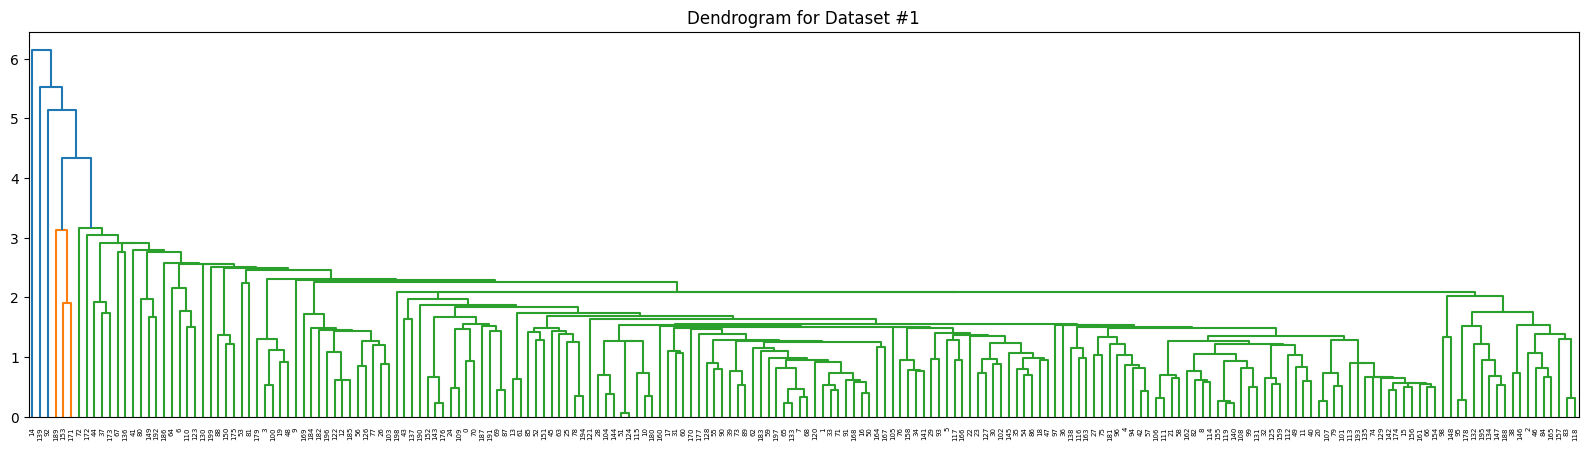

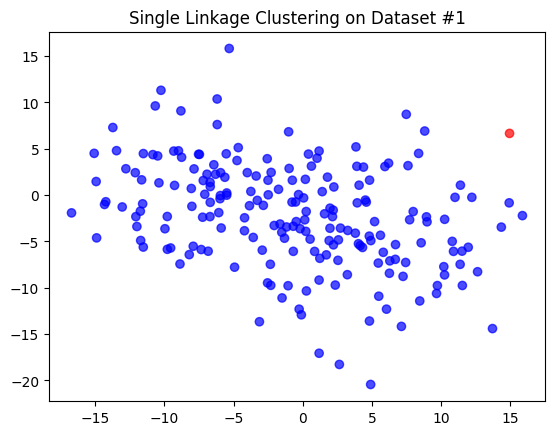

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

myLinkage = linkage(X1, method='single')
plt.figure(figsize=(20, 5))
dendrogram(myLinkage)
plt.title('Dendrogram for Dataset #1')
plt.show()

# Update myColors dictionary to handle more clusters
myColors = {0: 'yellow', 1: 'blue', 2: 'red'}

clusters = fcluster(myLinkage, t=2, criterion='maxclust')
plt.scatter(X1[:, 0], X1[:, 1], c=pd.Series(clusters).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Single Linkage Clustering on Dataset #1')
plt.show()

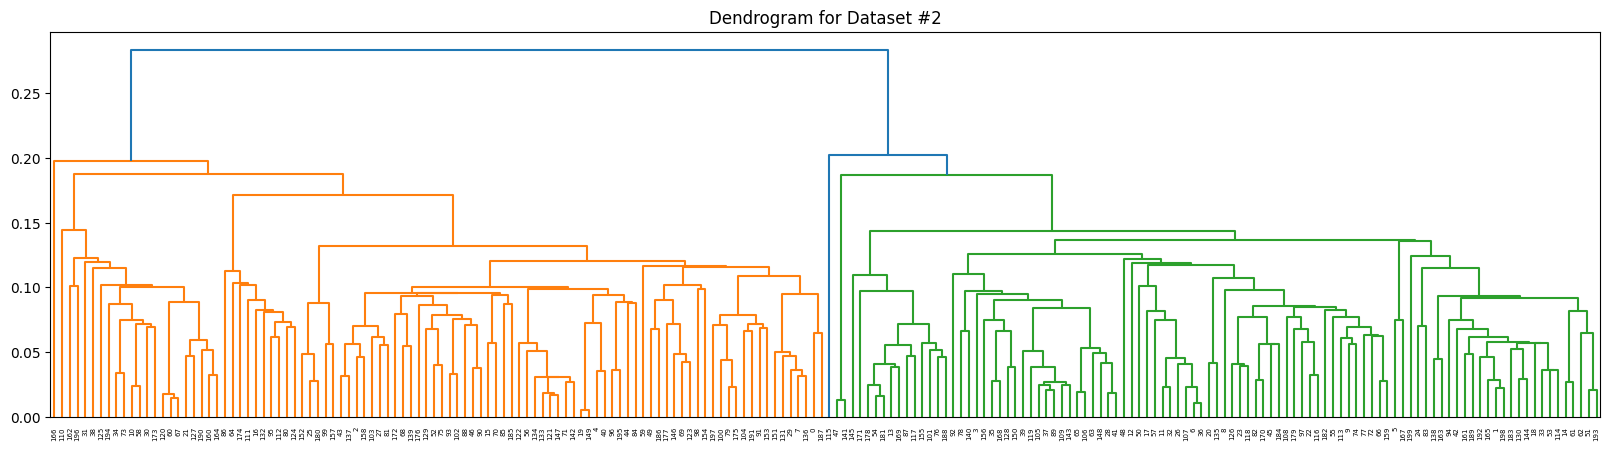

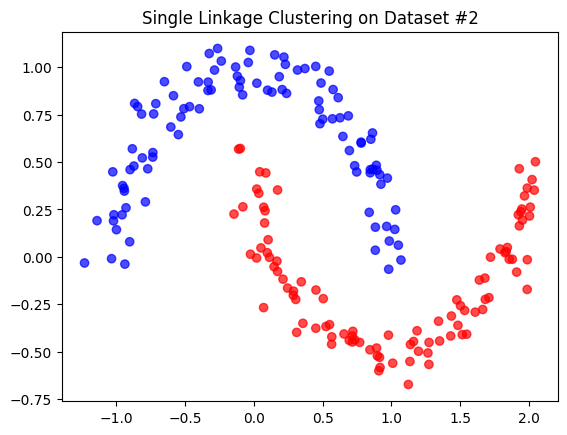

In [15]:
myLinkage_X2 = linkage(X2, method='single')
plt.figure(figsize=(20, 5))
dendrogram(myLinkage_X2)
plt.title('Dendrogram for Dataset #2')
plt.show()

clusters_X2 = fcluster(myLinkage_X2, t=2, criterion='maxclust')
plt.scatter(X2[:, 0], X2[:, 1], c=pd.Series(clusters_X2).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Single Linkage Clustering on Dataset #2')
plt.show()

Single linkage funciona mejor que aglomerativo para el de lunas, pero no para el de blobs.

## Dataset Iris
Ahora vamos a probar a hacer clustering con el dataset Iris.

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data_pd = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data_pd


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


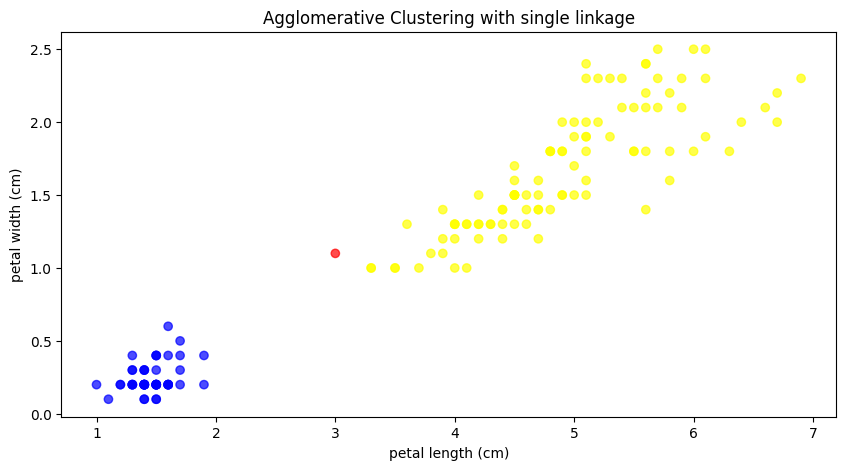

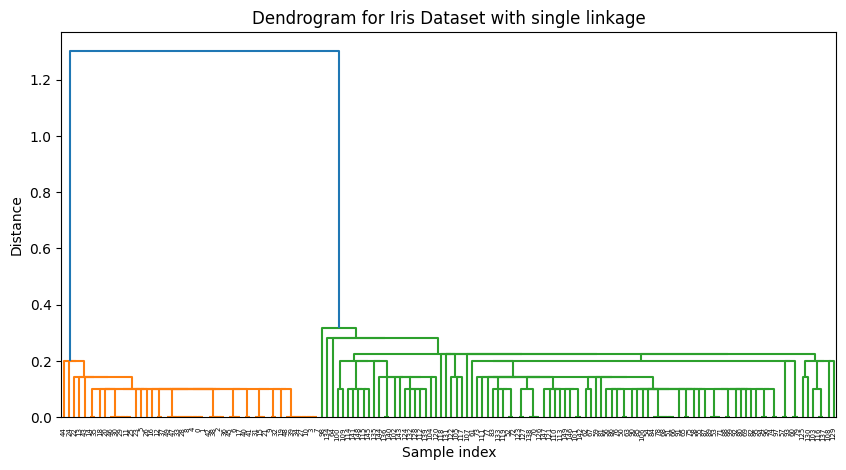

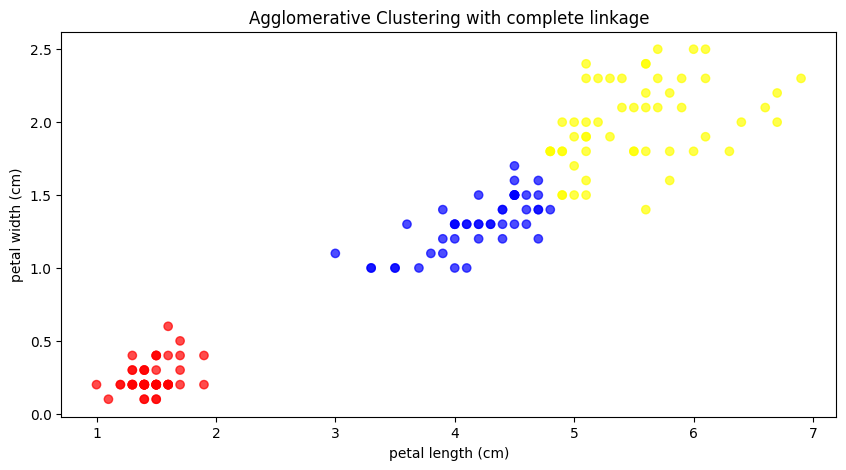

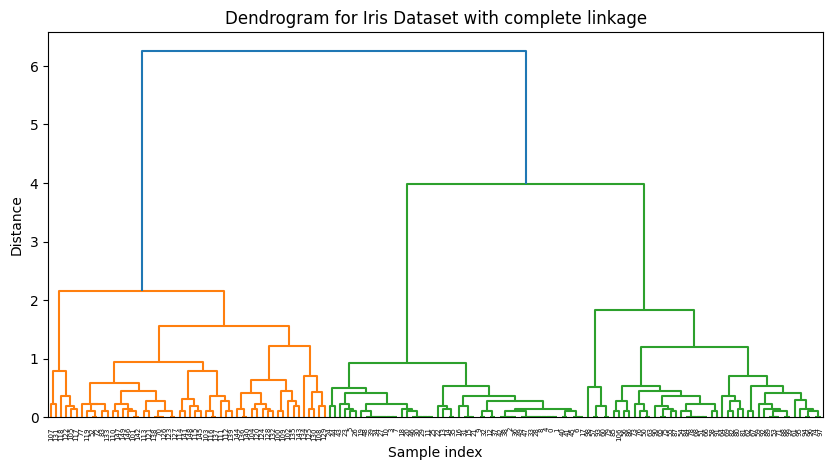

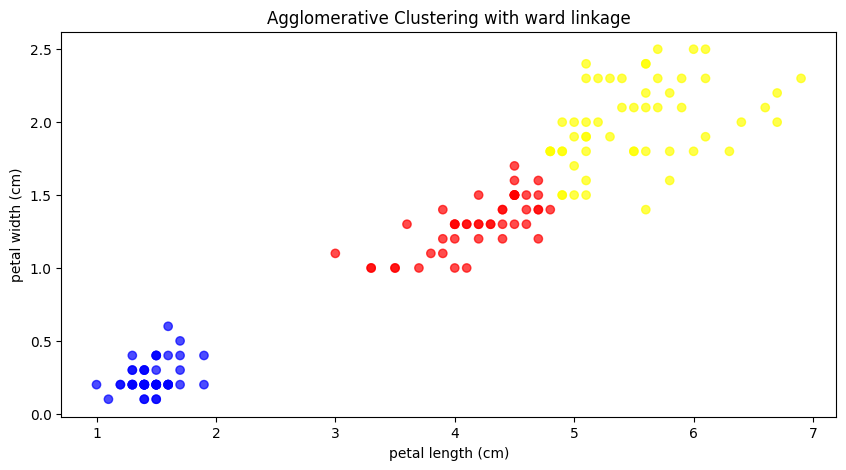

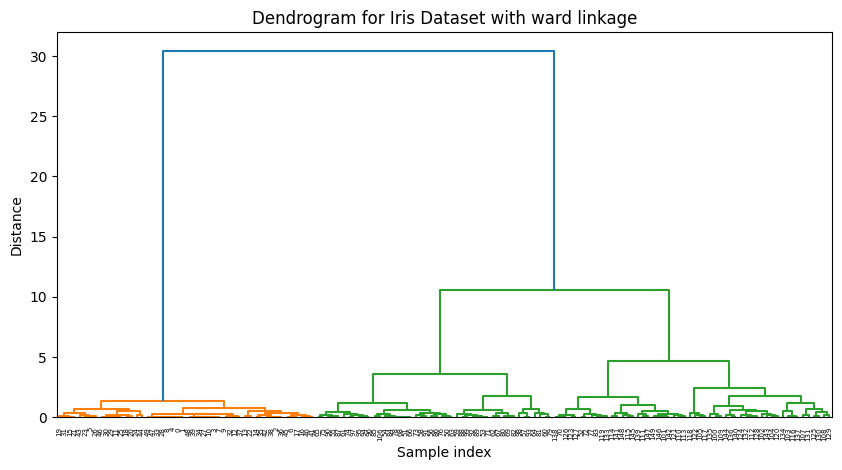

In [30]:
from scipy.cluster import hierarchy

# Selecciona las columnas 2 y 3 del DataFrame iris_data_pd
iris_data = iris_data_pd.iloc[:, 2:4]

# Tipo de linkage
linkage_methods = ['single', 'complete', 'ward']
for idx, method in enumerate(linkage_methods): 
    hier = AgglomerativeClustering(n_clusters=3, linkage=method, metric='euclidean')
    hier.fit(iris_data)
    
    # Plot clustering results
    plt.figure(figsize=(10, 5))
    plt.scatter(iris_data.iloc[:, 0], iris_data.iloc[:, 1], c=pd.Series(hier.labels_).apply(lambda x: myColors[x]), alpha=0.7)
    plt.title(f'Agglomerative Clustering with {method} linkage')
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.show()
    
    #Plot dendogram using hierarchi
    Z = hierarchy.linkage(iris_data, method=method)
    plt.figure(figsize=(10, 5))
    hierarchy.dendrogram(Z)
    plt.title(f'Dendrogram for Iris Dataset with {method} linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()